<a href="https://colab.research.google.com/github/GoradiaNishant/DSML/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
%matplotlib inline

import seaborn as sns 

np.random.seed(2021)

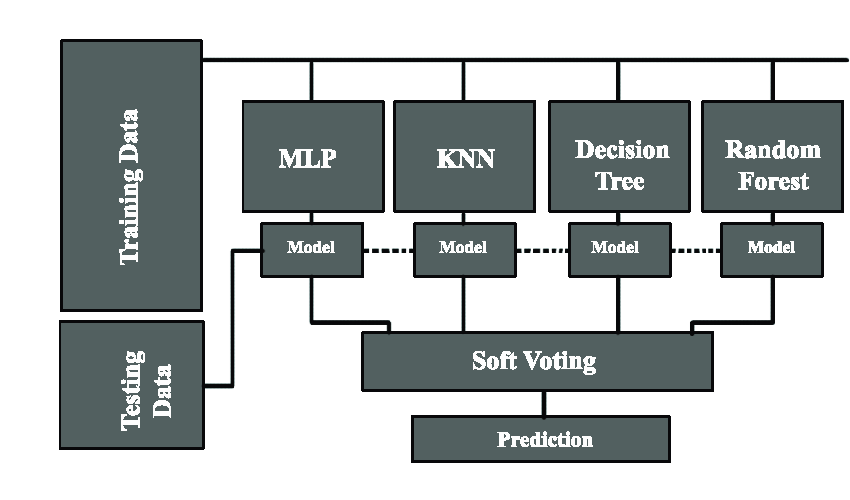

In [2]:
columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar','x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data', header=None, names = columns)

In [4]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


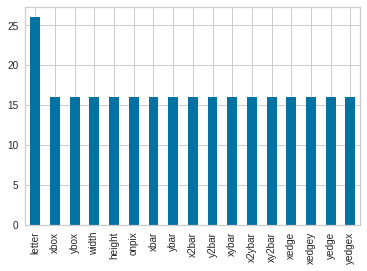

In [5]:
#plt.show()
data.nunique().plot(kind="bar")
plt.show()

In [6]:
X = data.drop(['letter'], axis=1).values
Y = data['letter'].values

In [7]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values.reshape(-1,1)

In [8]:
x.shape, y.shape

((20000, 16), (20000, 1))

In [9]:
X.shape, Y.shape

((20000, 16), (20000,))

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lc= LabelEncoder()

In [12]:
y = lc.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([19,  8,  3, ..., 19, 18,  0])

In [13]:
print(y)

[19  8  3 ... 19 18  0]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Logistic Regression

In [15]:
lr = LogisticRegression(max_iter=100, n_jobs=-1)
lr.fit(x_train, y_train)
y_pred =  lr.predict(x_test)
print("--------------- Logistic Regression Report -----------------------")
print(f"Accuracy : {lr.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred)}")
print("------------------------------------------------------------------")

--------------- Logistic Regression Report -----------------------
Accuracy : 0.772
Cohen Kappa : 0.7628000414753144
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.68      0.79      0.73       121
           2       0.76      0.68      0.72       105
           3       0.74      0.81      0.77       114
           4       0.75      0.78      0.76       103
           5       0.75      0.78      0.77        96
           6       0.57      0.52      0.54       118
           7       0.61      0.36      0.45       110
           8       0.82      0.82      0.82       108
           9       0.80      0.85      0.82       121
          10       0.61      0.68      0.64        96
          11       0.82      0.82      0.82       114
          12       0.95      0.88      0.91       122
          13       0.81      0.85      0.83       115
          14       0.69      0.76      0.73     

###KNN

In [21]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)
y_pred =  KNN.predict(x_test)
print("--------------- Logistic Regression Report -----------------------")
print(f"Accuracy : {KNN.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred)}")
print("------------------------------------------------------------------")

--------------- Logistic Regression Report -----------------------
Accuracy : 0.9513333333333334
Cohen Kappa : 0.9493721920638715
Classification Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.87      0.97      0.91       121
           2       0.96      0.94      0.95       105
           3       0.86      0.96      0.91       114
           4       0.94      0.94      0.94       103
           5       0.88      0.95      0.91        96
           6       0.96      0.96      0.96       118
           7       0.92      0.87      0.90       110
           8       0.94      0.95      0.95       108
           9       0.96      0.93      0.95       121
          10       0.94      0.93      0.93        96
          11       0.97      0.97      0.97       114
          12       0.99      0.96      0.97       122
          13       0.98      0.94      0.96       115
          14       0.96      0.96  

## Decision Tree

In [19]:
dt = DecisionTreeClassifier(max_depth=100, random_state=2021)
dt.fit(x_train, y_train)
y_pred =  dt.predict(x_test)
print("--------------- Decision Tree Report -----------------------")
print(f"Accuracy : {dt.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred)}")
print("------------------------------------------------------------")

--------------- Decision Tree Report -----------------------
Accuracy : 0.8923333333333333
Cohen Kappa : 0.8879902032463421
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.85      0.88      0.87       121
           2       0.96      0.87      0.91       105
           3       0.79      0.89      0.84       114
           4       0.79      0.91      0.85       103
           5       0.82      0.85      0.84        96
           6       0.83      0.86      0.85       118
           7       0.82      0.85      0.84       110
           8       0.89      0.89      0.89       108
           9       0.91      0.91      0.91       121
          10       0.91      0.83      0.87        96
          11       0.92      0.96      0.94       114
          12       0.87      0.90      0.88       122
          13       0.92      0.84      0.88       115
          14       0.90      0.92      0.

## SVM

In [20]:
svm = SVC(C=100)
svm.fit(x_train, y_train)
y_pred =  svm.predict(x_test)
print("--------------------- SVM Report ---------------------")
print(f"Accuracy : {svm.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred)}")
print("------------------------------------------------------")

--------------------- SVM Report ---------------------
Accuracy : 0.974
Cohen Kappa : 0.9729514290892816
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       0.94      0.97      0.95       121
           2       0.98      0.95      0.97       105
           3       0.92      0.96      0.94       114
           4       0.93      0.97      0.95       103
           5       0.97      0.99      0.98        96
           6       0.96      0.97      0.97       118
           7       0.94      0.93      0.93       110
           8       0.98      0.97      0.98       108
           9       0.99      0.97      0.98       121
          10       0.97      0.94      0.95        96
          11       0.99      0.98      0.99       114
          12       0.99      1.00      1.00       122
          13       0.97      0.96      0.96       115
          14       0.96      0.98      0.97       113
      

## Voting Classifier

In [32]:
estimator = []

# Logistic Regression
lr = LogisticRegression(max_iter=100)
estimator.append(('Logistic  Regression', lr))

# KNN
KNN = KNeighborsClassifier(n_neighbors=7)
estimator.append(('KnearestNabiour', KNN))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=100, random_state=2021)
estimator.append(('Decision Tree', dt))

# Support Vector Machine
svm = SVC(C=100)
estimator.append(('SVM', svm))

# Define the Voting Classifier
vc = VotingClassifier(estimators=estimator, weights=[1, 1, 2, 3])

eclf = vc.fit(x_train, y_train)
print("Score:{0}".format((eclf.score(x_train, y_train))*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Score:99.8


In [33]:
y_pred = eclf.predict(x_test)
print("--------------------- Voting Classifier Report ---------------------")
print(f"Accuracy : {eclf.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred)}")
print("--------------------------------------------------------------------")

--------------------- Voting Classifier Report ---------------------
Accuracy : 0.9726666666666667
Cohen Kappa : 0.9715642998801193
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       0.94      0.98      0.96       121
           2       0.98      0.95      0.97       105
           3       0.90      0.96      0.93       114
           4       0.93      0.97      0.95       103
           5       0.96      0.99      0.97        96
           6       0.96      0.97      0.96       118
           7       0.94      0.93      0.94       110
           8       0.96      0.97      0.97       108
           9       0.99      0.96      0.97       121
          10       0.97      0.93      0.95        96
          11       0.99      0.98      0.99       114
          12       0.99      1.00      1.00       122
          13       0.98      0.95      0.96       115
          14       0.97      0.98

## Stacking classifier

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import model_selection

%matplotlib inline

import seaborn as sns 

np.random.seed(2021)

In [35]:
columns = ['letter', 'xbox', 'ybox', 'width', 'height', 
           'onpix', 'xbar', 'ybar','x2bar', 'y2bar', 
           'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
           
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data', 
                 header=None, 
                 names = columns)

In [36]:
estimators = [
              ('SVC', SVC(C = 100, gamma='auto', kernel='poly')),
              ('nuSVC', NuSVC(kernel='poly')),
]

In [37]:
sc = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

In [38]:
sc.fit(x_train, y_train)
y_pred =  sc.predict(x_test)
print("--------------- SVM Stacking Classifier Report -----------------------")
print(f"Accuracy : {sc.score(x_test, y_test)}")
print(f"Cohen Kappa : {cohen_kappa_score(y_test, y_pred)}")
print(f"Classification Report :\n{classification_report(y_test, y_pred, target_names=np.unique(Y).tolist())}")
print("----------------------------------------------------------------------")

--------------- SVM Stacking Classifier Report -----------------------
Accuracy : 0.9643333333333334
Cohen Kappa : 0.9628948233539288
Classification Report :
              precision    recall  f1-score   support

           A       0.99      0.97      0.98       107
           B       0.94      0.97      0.96       121
           C       0.95      0.94      0.95       105
           D       0.96      0.94      0.95       114
           E       0.91      0.97      0.94       103
           F       0.96      0.96      0.96        96
           G       0.95      0.95      0.95       118
           H       0.91      0.94      0.92       110
           I       0.96      0.93      0.94       108
           J       0.96      0.96      0.96       121
           K       0.93      0.95      0.94        96
           L       1.00      0.96      0.98       114
           M       0.98      0.98      0.98       122
           N       0.96      0.96      0.96       115
           O       0.96      0.

In [39]:
print(y)

[19  8  3 ... 19 18  0]


In [40]:
print(Y)

['T' 'I' 'D' ... 'T' 'S' 'A']


In [41]:
x = sc.predict([[2,5,6,1,0,6,3,6,5,5,5,2,3,10,5,6]])

In [43]:
print(x)

[14]


In [44]:
z = np.array(y)

In [45]:
print(z)

[19  8  3 ... 19 18  0]


In [46]:
z.dtype

dtype('int64')

In [47]:
type(z)

numpy.ndarray

In [48]:
count = 0
for i in y:
  if i== 3:
    break
  count = count+1

In [49]:
count

2

In [50]:
print(Y[count])

D
